In [18]:
import tensorflow

In [19]:
print(tensorflow.__version__)

2.5.0


In [20]:
#import keras library
import keras
#import ImageDataGenerator class from keras
from keras.preprocessing.image import ImageDataGenerator

In [21]:
#Define the parameters /arguments for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)


test_datagen=ImageDataGenerator(rescale=1./255)

In [22]:
#: Applying ImageDataGenerator functionality to train_set.
#give the path of training images folder
x_train = train_datagen.flow_from_directory(r'C:\Users\shekh\OneDrive\Desktop\Smart Externship\Project\sir\Detecting-Forest-Combustion-in-Forests-main\Dataset\train_set',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 436 images belonging to 2 classes.


In [23]:
#: Applying ImageDataGenerator functionality to testset.
#give the path of testing images folder
x_test = test_datagen.flow_from_directory(r'C:\Users\shekh\OneDrive\Desktop\Smart Externship\Project\AI_Project\Dataset\test_set',
                                          target_size = (128,128),
                                          batch_size = 32,
                                          class_mode = 'binary')

Found 121 images belonging to 2 classes.


In [24]:
'''import model building libraries'''

#To define linear intialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D
#import Flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [25]:
#intializing the model
model =Sequential()

In [26]:
#add convolutional layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [27]:
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
#add flatten layer
model.add(Flatten())

In [29]:
#add hidden layer
model.add(Dense(kernel_initializer='uniform',activation='relu',units=150))

In [30]:
#add hidden layermodel.add(Dense(output_dim=64,init='uniform',activation='relu'))

In [31]:
#add output layer
model.add(Dense(kernel_initializer='uniform',activation='sigmoid',units=1))

In [32]:
#to check the indices
print(x_train.class_indices)

{'forest': 0, 'with fire': 1}


In [33]:
#configure the learning process
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [34]:
#Training the model
model.fit_generator(x_train,steps_per_epoch=14,
                    epochs=10,validation_data=x_test,
                    validation_steps=4)

Epoch 1/10
14/14 [==============================] - 18s 1s/step - loss: 1.7047 - accuracy: 0.6043 - val_loss: 0.3244 - val_accuracy: 0.8347
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.4769 - accuracy: 0.7647 - val_loss: 0.1752 - val_accuracy: 0.9091
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.2523 - accuracy: 0.8850 - val_loss: 0.1149 - val_accuracy: 0.9587
Epoch 4/10
14/14 [==============================] - 14s 1s/step - loss: 0.2363 - accuracy: 0.9040 - val_loss: 0.1179 - val_accuracy: 0.9339
Epoch 5/10
14/14 [==============================] - 15s 1s/step - loss: 0.2459 - accuracy: 0.8822 - val_loss: 0.0832 - val_accuracy: 0.9835
Epoch 6/10
14/14 [==============================] - 17s 1s/step - loss: 0.1460 - accuracy: 0.9417 - val_loss: 0.0832 - val_accuracy: 0.9752
Epoch 7/10
14/14 [==============================] - 16s 1s/step - loss: 0.1788 - accuracy: 0.9333 - val_loss: 0.1698 - val_accuracy: 0.9174
Epoch 8/10
14/14 [==

In [35]:
#save the model
model.save("forest1.h5")

# Prediction

In [36]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
from keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [37]:
#load the saved model
model = load_model("forest1.h5")

In [38]:
#give any random image path
img = image.load_img(r'C:\Users\shekh\OneDrive\Desktop\Smart Externship\Project\AI_Project\Dataset\test_set\with fire\Untitled_design_161_866x487.jpg',target_size = (128,128))

x = image.img_to_array(img)
#expand the image shape
x = np.expand_dims(x,axis = 0)

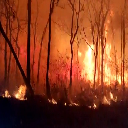

In [39]:
img

In [40]:
pred = model.predict_classes(x)

In [41]:
pred

array([[1]])

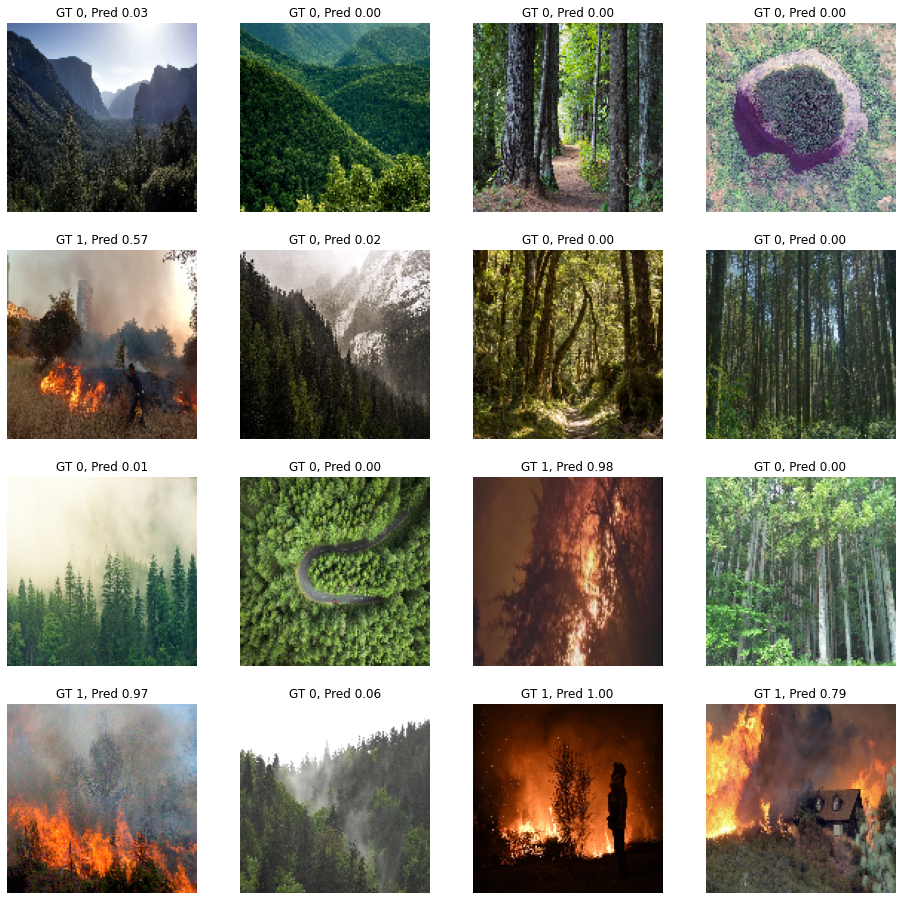

In [42]:
import matplotlib.pyplot as plt

val_imgs, val_labels = x_test.__getitem__(0)

preds = model.predict(val_imgs)

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for img, label, pred, ax in zip(val_imgs, val_labels, preds, axes.flatten()):
    ax.imshow(img)
    ax.set_title('GT %d, Pred %.2f' % (label, pred))
    ax.set_axis_off()

# opencv prediction

In [43]:
cv2.__version__

'4.5.4-dev'

In [44]:
import cv2
#import facevec
import numpy as np
import smtplib
from keras.preprocessing import image 
from keras.models  import load_model
from twilio.rest import Client

model = load_model(r'forest1.h5') 
video = cv2.VideoCapture(0)
name = ['forest','with fire']
    
while(1):
    success, frame = video.read()
    cv2.imwrite("image.jpg",frame)
    img = image.load_img("image.jpg",target_size = (128,128))
    x  = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    pred = model.predict_classes(x)
    p = pred[0][0]
    print(pred)
    cv2.putText(frame, "predicted  class = "+str(name[p]), (100,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)
    
    
    pred = model.predict_classes(x)
    if pred[0]==1:
        account_sid = 'AC1c8dcd9c3e1050b73a9f759840376f22'
        auth_token = 'c6e0b37a17702dddacfa67e10baece02'
        client = Client(account_sid, auth_token)

        message = client.messages \
        .create(
         body='Forest Fire is detected, stay alert',
         from_=' +16122611822',
         to='+919346881567')
        print(message.sid)
    
        print('Fire Detected')
        print ('SMS sent!')
        break
    else:
        print("no danger")
       #break
    cv2.imshow("image",frame)
   
    if cv2.waitKey(1) & 0xFF == ord('a'): 
        break

video.release()
cv2.destroyAllWindows()

[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no danger
[[0]]
no

In [45]:
## Done